In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

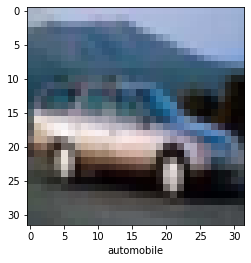

In [13]:
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[4][0]])
plt.show()

In [14]:
# MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5052 - accuracy: 0.4528 - val_loss: 1.3026 - val_accuracy: 0.5503
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1234 - accuracy: 0.6018 - val_loss: 1.0423 - val_accuracy: 0.6327
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9643 - accuracy: 0.6617 - val_loss: 0.9626 - val_accuracy: 0.6651
Epoch 4/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8687 - accuracy: 0.6957 - val_loss: 0.8815 - val_accuracy: 0.6962
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7986 - accuracy: 0.7188 - val_loss: 0.9041 - val_accuracy: 0.6840


In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.9041 - accuracy: 0.6840
